# $\nu$-electron scattering 

Testing the neutrino-electron scattering rate calculation for Xenon. We use the free electron approximation but also include a stepping process to approximate the impact of the atomic ionisation energy levels which suppress the rate at very low recoil energies.

First we look at the energy levels in Xenon. The approximation works by applying a heaviside function to the free electron neutrino-electron cross section de-weight those electrons that can't be ionised by the incoming neutrino with a defined energy. i.e.

\begin{equation}
\frac{\textrm{d}\sigma^i}{\textrm{d} E_R} = \sum\limits_{k=1}^{Z} \Theta(E_R-E^k_B) \frac{\textrm{d}\sigma^i_0}{\textrm{d}E_R}
\end{equation}

where $i$ refers to neutrino flavour, $\sigma_0$ is the cross section for a free electron, and $E^k_B$ is the ionisation energy of the $k$th level. 

### First we take a look at the xenon energy levels:

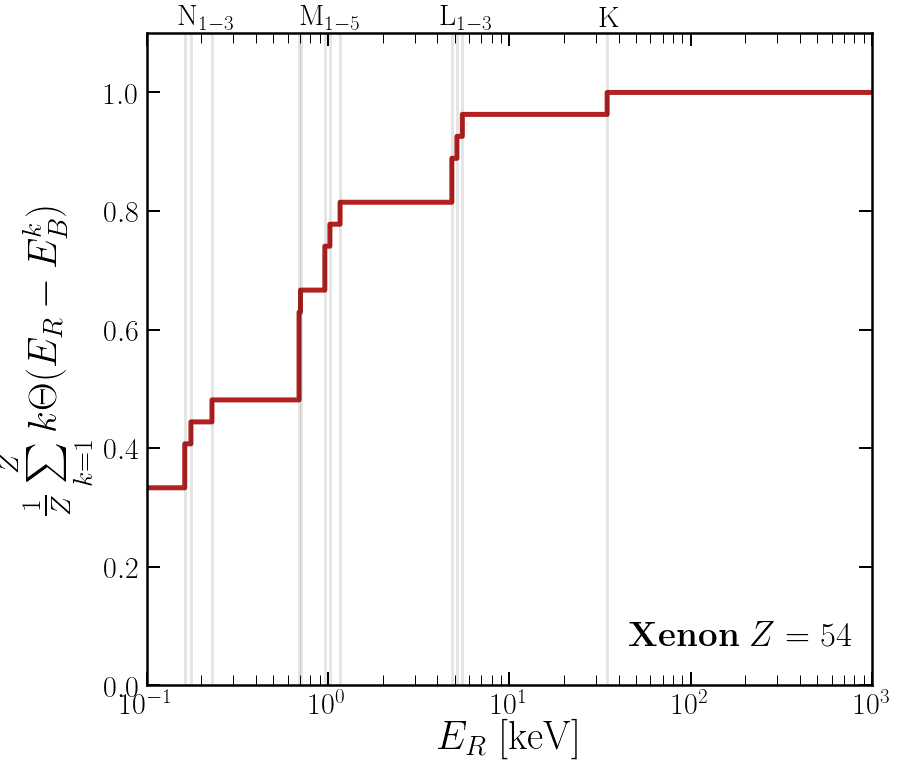

In [2]:
import sys
sys.path.append('../erec')
from numpy import *
import matplotlib.pyplot as plt
from Params import *
from LabFuncs import *
from DMFuncs import *
from PlotFuncs import *
from NeutrinoFuncs import *
from AtomicFuncs import *


# Function for outputting the sum of the heaviside functions
def XeStep(E_r): # E_r is always in keV 
    Z = 54
    # Xenon energy levels (in eV) from arXiv:1610.04177
    E_B_vals = array([34759.3]*2\
                     +[5509.8]*2+[5161.5]*2+[4835.6]*4\
                     +[1170.5]*2+[1024.8]*2+[961.2]*4+[708.1]*2+[694.9]*8\
                     +[229.4]*2+[175.6]*2+[162.8]*4+[73.8]*2+[71.7]*8\
                     +[27.5]*2+[13.4]*4+[12.0]*2) 
    TH = zeros(shape=shape(E_r))
    for i in range(0,Z):
        TH += 1.0*(E_r>E_B_vals[i]/1000.0)
    # Neutrino rate later multiplies by Z so we divide by it here to not overcount
    TH = TH/(1.0*Z)
    return TH,E_B_vals
    
# Set up plot    
fig,ax = MySquarePlot(r'$E_R$ [keV]',r'$\frac{1}{Z}\sum\limits_{k=1}^{Z} k \Theta(E_R-E^k_B)$',lfs=40,tfs=30)

# Plot step functions
ne = 2000
E_r = logspace(-1,3,ne)
st,E_B_vals = XeStep(E_r)
plt.step(E_r,st,'-',lw=5,color='firebrick')

E_prev = 0.0
for i in range(0,54):
    if (E_B_vals[i]!=E_prev)&(E_B_vals[i]/1000.0>E_r[0]):
        plt.plot(E_B_vals[i]*array([1,1])/1000.0,[0.0,1.1],'k-',lw=3,alpha=0.1)
    E_prev = 1.0*E_B_vals[i]


# Add shell labels
plt.text(34759.3/1000.0*0.9,1.11,'K',fontsize=30)    
plt.text(5509.8/1000.0*0.75,1.11,'L$_{1-3}$',fontsize=30)   
plt.text(1170.5/1000.0*0.6,1.11,'M$_{1-5}$',fontsize=30)
plt.text(229.4/1000.0*0.65,1.11,'N$_{1-3}$',fontsize=30)

# Plot tweaking
#plt.yscale('log')
plt.xlim([E_r[0],E_r[-1]])
plt.ylim([0.0,1.1])
plt.xscale('log')
plt.gcf().text(0.64,0.17,r'{\bf Xenon} $Z = 54$',fontsize=35)

# Show and save
plt.show()
pltname = "XenonStep"
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

# Neutrino-electron recoil rates for the two approximations

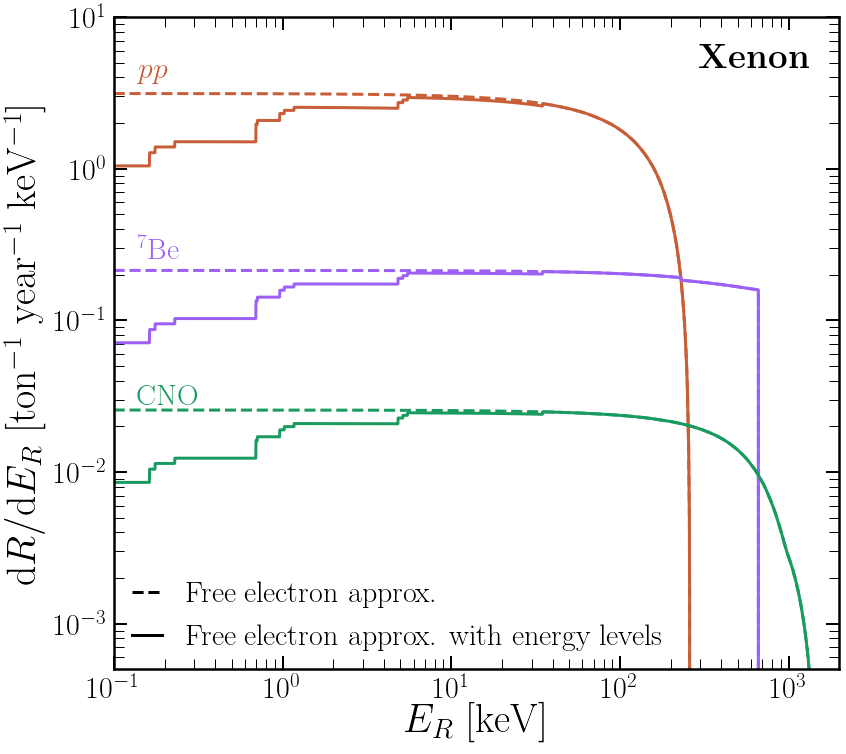

In [31]:
import cmocean

# Load neutrino fluxes
NuBG = GetNuFluxes(0.0,Xe131)
E_nu_all = NuBG.Energy
Flux_all = NuBG.Flux
n_nu = NuBG.NumberOfNeutrinos 
Errs = NuBG.Uncertainties
solar = NuBG.SolarLabel

fig,ax = MySquarePlot(r'$E_R$ [keV]',r'$\textrm{d}R/\textrm{d}E_R$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]',lfs=40,tfs=30)

ne = 5000
E_r = logspace(-4.0,3.2,ne)
TH,E_B_vals = XeStep(E_r)
ymax = 5.0
ymin = 3.0e-3

col = cmocean.cm.phase(linspace(0.1,0.8,3))

# pp
dR1 = dRdEe_nu(E_r,0.0,solar[0],E_nu_all[:,0],Flux_all[:,0],Xe131,flav_Solar)
plt.plot(E_r,dR1,'--',lw=3,color=col[0,:])
plt.plot(E_r,dR1*TH,'-',lw=3,color=col[0,:])

# 7Be
dR2 = dRdEe_nu(E_r,0.0,solar[3],E_nu_all[:,3],Flux_all[:,3],Xe131,flav_Solar)\
        +dRdEe_nu(E_r,0.0,solar[4],E_nu_all[:,4],Flux_all[:,4],Xe131,flav_Solar)
plt.plot(E_r,dR2,'--',lw=3,color=col[1,:])
plt.plot(E_r,dR2*TH,'-',lw=3,color=col[1,:])

# CNO
dR3 = dRdEe_nu(E_r,0.0,solar[6],E_nu_all[:,6],Flux_all[:,6],Xe131,flav_Solar)\
        +dRdEe_nu(E_r,0.0,solar[7],E_nu_all[:,7],Flux_all[:,7],Xe131,flav_Solar)\
        +dRdEe_nu(E_r,0.0,solar[8],E_nu_all[:,8],Flux_all[:,8],Xe131,flav_Solar)
plt.plot(E_r,dR3,'--',lw=3,color=col[2,:])
plt.plot(E_r,dR3*TH,'-',lw=3,color=col[2,:])

# pep
# dR4 = dRdEe_nu(E_r,0.0,solar[1],E_nu_all[:,1],Flux_all[:,1],Xe131,flav_Solar)
# plt.plot(E_r,dR4,'--',lw=3,color=col[3,:])
# plt.plot(E_r,dR4*TH,'-',lw=3,color=col[3,:])

plt.plot(-E_r,dR1+dR2+dR3,'k--',lw=3,label='Free electron approx.')
plt.plot(-E_r,(dR1+dR2+dR3),'k-',lw=3,label='Free electron approx. with energy levels')
plt.legend(frameon=False,fontsize=30,borderpad=0.1,handlelength=1)


plt.gcf().text(0.15,0.43,'CNO',color=col[2,:])
plt.gcf().text(0.15,0.6,'$^7$Be',color=col[1,:])
plt.gcf().text(0.15,0.81,'$pp$',color=col[0,:])
plt.gcf().text(0.75,0.82,r'{\bf Xenon}',fontsize=35)

plt.xscale('log')
plt.yscale('log')
plt.ylim([5.0e-4,10.0])
plt.xlim([0.1,2000.0])
plt.show()
pltname = "NuRate_Xe_electrons"
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

# Does a finite energy resolution remove these features?

Energy resolution in xenon detectors looks something like,
\begin{equation}
\frac{\sigma}{E_R} = c_1\sqrt{\frac{1 {\rm keV}}{E_R}} + c_2
\end{equation}
From arXiv:1610.02076 the fit to known peaks in LUX's ER background has $c_1 = 0.33\pm0.01$ and $c_2\simeq0.0$. For results to come we should be using the 2d (S1,S2) pdf for ERs but for now we just want to see how it looks.

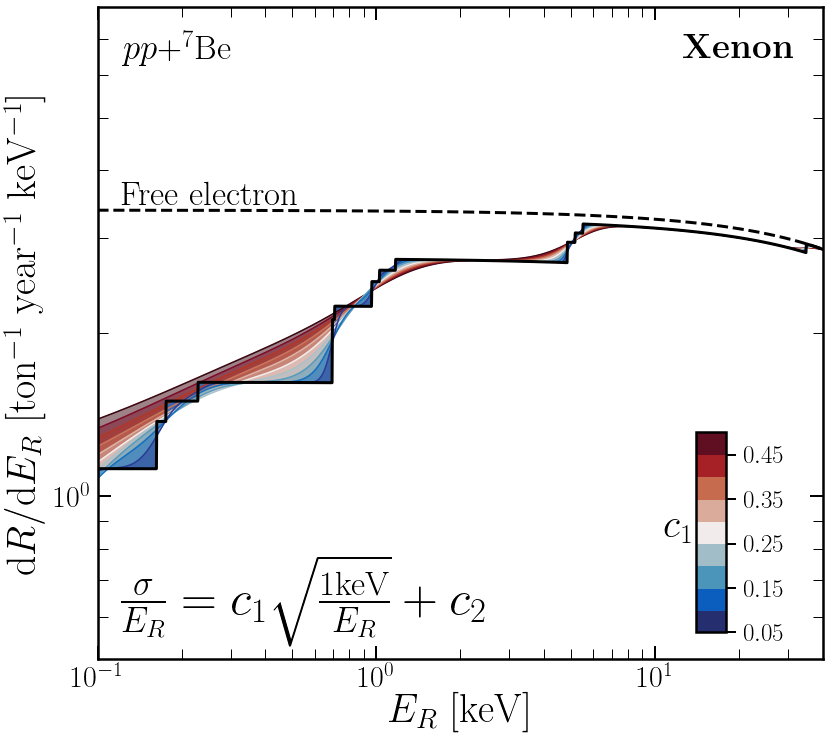

In [21]:
fig,ax = MySquarePlot(r'$E_R$ [keV]',r'$\textrm{d}R/\textrm{d}E_R$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]',lfs=40,tfs=30)

n_c1_vals = 10
c1_vals = linspace(0.05,0.5,n_c1_vals)
dR0 = TH*(dR1+dR2+dR3)

col = cmocean.cm.balance(linspace(0.1,1.0,n_c1_vals))

for i in flipud(range(0,n_c1_vals)):
    c1 = c1_vals[i]
    c2 = 0.00
    sig_E = c1*sqrt(E_r)+c2*E_r
    dR = SmearE(E_r,dR0,sig_E)
    plt.fill_between(E_r,dR,y2=dR0,color=col[i,:],alpha=0.5)
    plt.plot(E_r,dR,'-',color=col[i,:])
    
plt.plot(E_r,dR0,'k-',lw=3)
plt.plot(E_r,(dR1+dR2+dR3),'k--',lw=3)

plt.gcf().text(0.15,0.15,r'$\frac{\sigma}{E_R} = c_1\sqrt{\frac{1 {\rm keV}}{E_R}} + c_2$',fontsize=50)
plt.gcf().text(0.15,0.82,r'$pp$+$^7$Be+CNO',fontsize=35)
plt.gcf().text(0.75,0.82,r'{\bf Xenon}',fontsize=35)
plt.gcf().text(0.15,0.65,r'Free electron',fontsize=35)

plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,40.0])
plt.ylim([5.0e-1,8.0])


# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="15%", height="20%", bbox_to_anchor=[560, -650, 200, 1000]) 
norm = mpl.colors.Normalize(vmin=c1_vals[0],vmax=c1_vals[-1])
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.balance, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=arange(c1_vals[0],c1_vals[-1],0.1),boundaries=c1_vals,orientation='vertical')
f = plt.gcf().get_children()
cbar = f[2]
cbar.tick_params(labelsize=25) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.73,0.26,r'$c_1$',fontsize=40,color='k')



plt.show()
pltname = "NuRate_Xe_electrons_vs_resolution"
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')